In [1]:
from gymnasium.core import RenderFrame, ActType, ObsType
%load_ext autoreload
%autoreload 2

import torch

In [5]:
from src.networks.core.tensor_shape import TensorShape
from src.networks.core.net import Net
from src.networks.skip_nets.modulated_dense_skip_net import ModulatedDenseSkipNet


def create_mod_dense(from_idx: int, to_idx: int, num_f: int):
    if from_idx != to_idx:
        return Net.as_net(create_ones_linear(num_f, 2))
    else:
        return Net.as_net(nn.Identity())

def create_mod_additive(from_idx: int, to_idx: int, num_f: int):
    if from_idx != to_idx:
        return Net.as_net(create_ones_linear(num_f, num_f))
    else:
        return Net.as_net(nn.Identity())

def create_ones_linear(in_features, out_features):
    l = nn.Linear(in_features, out_features)
    l.weight.data[:] = 1.0
    l.bias.data[:] = 0.0
    return l

def create_layer(i, is_last, in_features, out_features):
    return nn.Sequential(
        create_ones_linear(in_features, out_features),
        nn.CELU() if not is_last else nn.Identity(),
    )

num_features=3
# net = AdditiveSkipNet.from_layer_provider(
#     layer_provider=create_layer,
#     num_layers=4,
#     num_features=num_features,
#     layer_connections='full',
#     initial_direct_connection_weight=1.0,
#     initial_skip_connection_weight=0.01,
#     return_dense=False,
#     weights_trainable=False,
# )
# net = DenseSkipNet.from_layer_provider(
#     layer_provider=create_layer,
#     num_layers=10,
#     num_features=num_features,
#     layer_connections='full'
# )
# net = ParallelNet.from_layer_provider(create_layer, in_size=num_features, out_sizes=[5, 7, 11, 13])
net = ModulatedDenseSkipNet.from_layer_provider(
    layer_provider=create_layer,
    modulator_provider=create_mod_dense,
    in_size=num_features,
    layer_out_sizes=[11, 23, 17, 13],
)
# net = ModulatedAdditiveSkipNet.from_layer_provider(
#     layer_provider=create_layer,
#     modulator_provider=create_mod_additive,
#     num_features=num_features,
#     num_layers=4,
#     # return_dense=True,
# )
print(net.count_parameters())
print(net)

out = net(torch.ones(111, 5, 19, num_features))
print(out.shape)
# print(out)
# print(net.forward_shape(TensorShape(features=num_features, s_0=111, s_1=5)))

1390
ModulatedDenseSkipNet(
  (layers): NetList(
    (0): TorchNet(
      (torch_module): Sequential(
        (0): Linear(in_features=3, out_features=11, bias=True)
        (1): CELU(alpha=1.0)
      )
    )
    (1): TorchNet(
      (torch_module): Sequential(
        (0): Linear(in_features=13, out_features=23, bias=True)
        (1): CELU(alpha=1.0)
      )
    )
    (2): TorchNet(
      (torch_module): Sequential(
        (0): Linear(in_features=27, out_features=17, bias=True)
        (1): CELU(alpha=1.0)
      )
    )
    (3): TorchNet(
      (torch_module): Sequential(
        (0): Linear(in_features=23, out_features=13, bias=True)
        (1): Identity()
      )
    )
  )
  (connection_modulators[0][0]): TorchNet(
    (torch_module): Identity()
  )
  (connection_modulators[1][0]): TorchNet(
    (torch_module): Linear(in_features=3, out_features=2, bias=True)
  )
  (connection_modulators[1][1]): TorchNet(
    (torch_module): Identity()
  )
  (connection_modulators[2][0]): TorchNet

In [6]:
90 * 3 + 3 * 3 * 18 + 3 * 3 * 3 + 3 * 3 * 1

468

In [7]:
3 * (90 + 18 + 3 + 1) + 468

804

In [8]:
804

804

In [9]:
from src.networks.core.torch_wrappers.conv_net import Conv2dNet

conv = Conv2dNet(2, 3, 4, padding='same')
conv

Conv2dNet(2, 3, kernel_size=(4, 4), stride=(1, 1), padding=same)

In [10]:
from src.networks.core.torch_wrappers.linear_net import LinearNet

lin = LinearNet(2, 3)
lin(torch.ones(2))

tensor([ 0.4794, -0.7732, -0.1890], grad_fn=<ViewBackward0>)

In [11]:
from src.networks.multihead_self_attention import MultiheadSelfAttention

mhsa = MultiheadSelfAttention(10, 5)
mhsa.forward_shape(TensorShape(features=10, s_0=None))
mhsa(torch.ones(123, 9, 10))

tensor([[[ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         [ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         [ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         ...,
         [ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         [ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         [ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041]],

        [[ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         [ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         [ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         ...,
         [ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         [ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         [ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041]],

        [[ 0.1577, -0.4909, -0.1444,  ...,  0.1137, -0.1642,  0.0041],
         [ 0.1577, -0.4909, -0.1444,  ...,  0

In [12]:
from src.networks.core.layer_connections import *
from src.integer_sequences import *

(LayerConnectionsBuilder(12)
    .sequential()
    .every_step_receives(factorial).every_step_to_output().to_np())

array([[ 0,  0],
       [ 0, 12],
       [ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 1,  6],
       [ 1,  7],
       [ 1,  8],
       [ 1,  9],
       [ 1, 10],
       [ 1, 11],
       [ 1, 12],
       [ 2,  2],
       [ 2,  3],
       [ 2,  4],
       [ 2,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 2, 10],
       [ 2, 11],
       [ 2, 12],
       [ 3,  3],
       [ 3, 12],
       [ 4,  4],
       [ 4, 12],
       [ 5,  5],
       [ 5, 12],
       [ 6,  6],
       [ 6,  7],
       [ 6,  8],
       [ 6,  9],
       [ 6, 10],
       [ 6, 11],
       [ 6, 12],
       [ 7,  7],
       [ 7, 12],
       [ 8,  8],
       [ 8, 12],
       [ 9,  9],
       [ 9, 12],
       [10, 10],
       [10, 12],
       [11, 11],
       [11, 12],
       [12, 12]], dtype=int32)

In [2]:

from src.torch_device import set_default_torch_device
%load_ext autoreload
%autoreload 2

import torch
from torch import optim, nn
from src.reinforcement_learning.a2c.episodic.a2c import A2C
import gymnasium as gym

device = set_default_torch_device("cuda:0")
print(f'using device {device}')

env = gym.make("BipedalWalker-v3", max_episode_steps=3000)

print(env)

def init_network(out_size: int, is_actor: bool):
    return SeqNet.from_layer_provider(
        layer_provider=lambda layer_nr, is_last_layer, in_features, out_features: nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.CELU() if not is_last_layer else (nn.Tanh() if is_actor else nn.Identity())
        ),
        in_size=24,
        out_sizes=[32, 32, 32, out_size]
    )

def select_action(logits: torch.Tensor):
    dist = Normal(loc=logits, scale=0.15)
    
    action = dist.sample()
    
    return action.detach().cpu().numpy(), dist.log_prob(action)

actor = init_network(4, True)
critic = init_network(1, False)

A2C(
    env=env,
    actor_network=actor,
    actor_network_optimizer=optim.Adam(actor.parameters()),
    critic_network=critic,
    critic_network_optimizer=optim.Adam(critic.parameters()),
    critic_loss=nn.MSELoss(),
    select_action=select_action,
    gamma=0.9,
    on_episode_done=lambda a2c, info: print(f'{info["i_episode"]:>4}: {info["episode_cumulative_reward"]:> 8.1f}, {info["end_timestep"]:>5}'),
).find_optimal_policy(1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using device cuda:0


ModuleNotFoundError: No module named 'imageio'

In [2]:
from typing import Any, SupportsFloat
from gymnasium.wrappers import RecordVideo
from src.reinforcement_learning.a2c.episodic.a2c_stm import A2CSTM
from src.torch_device import set_default_torch_device
from torch.distributions import Normal
%load_ext autoreload
%autoreload 2

import torch
from torch import optim, nn
from src.networks.core.seq_net import SeqNet
import gymnasium as gym

# device = set_default_torch_device("cuda:0")
# print(f'using device {device}')

env = gym.make("BipedalWalker-v3", max_episode_steps=3000, render_mode='rgb_array')

# env = RecordVideo(env, video_folder=r'C:\Users\Brn\Videos\rl-gym\run-0', episode_trigger=lambda i_ep: i_ep > 5)

print(env)

def init_network():
    class ACSTMNetwork(nn.Module):

        def __init__(self):
            super().__init__()

            in_size = 24
            actor_out_size = 4
            shared_out_sizes = [64, 128, 128, 128, 64]

            self.shared = SeqNet.from_layer_provider(
                layer_provider=lambda layer_nr, is_last_layer, in_features, out_features: nn.Sequential(
                    nn.Linear(in_features, out_features),
                    nn.CELU() if not is_last_layer else nn.Identity()
                ),
                in_size=in_size,
                out_sizes=shared_out_sizes
            )

            self.actor = nn.Sequential(nn.Linear(shared_out_sizes[-1], actor_out_size), nn.Tanh())
            self.critic = nn.Linear(shared_out_sizes[-1], 1)
            self.state_transition = nn.Linear(shared_out_sizes[-1], in_size)

        def forward(self, x: torch.Tensor):
            shared_out = self.shared(x)

            return self.actor(shared_out), self.critic(shared_out), self.state_transition(shared_out)

    return ACSTMNetwork()

def select_action(logits: torch.Tensor):
    dist = Normal(loc=logits, scale=0.2)

    action = dist.sample()

    return action.detach().cpu().numpy(), dist.log_prob(action)

shared_network = init_network()

def on_episode_done(a2c: A2CSTM, info: dict[str, Any]):
    if info['truncated']:
        a2c.memory.rewards[-1] = -30

    print(f'{info["i_episode"]:>4}: {info["episode_cumulative_reward"]:> 8.1f}, {info["end_timestep"]:>5}, {info["advantages"].squeeze().mean():> 8.2f}, {info["returns"][0]:> 8.2f}, {info["actor_objective__weighted"]:> 8.6f}, {info["critic_objective__weighted"]:> 8.6f}, {info["state_transition_objective__weighted"]:> 12.10f}'),

A2CSTM(
    env=env,
    combined_network=shared_network,
    combined_network_optimizer=optim.Adam(shared_network.parameters()),
    critic_loss=nn.MSELoss(),
    state_transition_loss=nn.MSELoss(),
    select_action=select_action,
    gamma=0.75,
    normalize_returns='std',
    normalize_advantages='std',
    actor_objective_weight=10,
    critic_objective_weight=0.5,
    state_transition_objective_weight=0.1,
    on_optimization_done=on_episode_done
).find_optimal_policy(1000)

SyntaxError: expected ':' (episodic_rl_base.py, line 27)

In [30]:
from src.reinforcement_learning.core.singleton_vector_env import SingletonVectorEnv
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
import gymnasium as gym

# Parallel environments
vec_env = make_vec_env(lambda: gym.make('CartPole-v1', render_mode='rgb_array'), n_envs=4)

model = A2C("MlpPolicy", vec_env, verbose=2)
model.learn(total_timesteps=25000)
model.save("a2c_cartpole")

del model # remove to demonstrate saving and loading

model = A2C.load("a2c_cartpole")

obs = vec_env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    vec_env.render("human")

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 26.1     |
|    ep_rew_mean        | 26.1     |
| time/                 |          |
|    fps                | 1461     |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 2000     |
| train/                |          |
|    entropy_loss       | -0.64    |
|    explained_variance | 0.159    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.3      |
|    value_loss         | 7.19     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 36.6     |
|    ep_rew_mean        | 36.6     |
| time/                 |          |
|    fps                | 1779     |
|    iterations         | 200      |
|    time_elapsed       | 2        |
|    total_timesteps    | 4000     |
| train/             


KeyboardInterrupt



In [7]:
from typing import Any
from gymnasium.spaces import Box, Discrete
from gymnasium.vector import SyncVectorEnv
from gymnasium.wrappers import AutoResetWrapper
import gymnasium as gym
import numpy as np
class TestEnv(gym.Env):
    def __init__(self, length: int):
        self.length = length
        self.counter = 0

        self.action_space = Discrete(2)
        self.observation_space = Box(-1, 1, (2,))

    def step(self, action: Any) -> tuple[np.ndarray, float, bool, bool, dict[str, Any]]:
        is_done = self.counter >= self.length
        self.counter += 1
        return np.array([self.counter, self.length]), 1.0, False, is_done, {}

    def render(self) -> None:
        pass

    def reset(
        self,
        *,
        seed: int | None = None,
        options: dict[str, Any] | None = None,
    ) -> tuple[np.ndarray, dict[str, Any]]:
        self.counter = 0
        return np.array([self.counter, self.length]), {}


# test_env = AutoResetWrapper(TestEnv(3))

test_env = SyncVectorEnv([
    lambda: AutoResetWrapper(TestEnv(3)),
    lambda: AutoResetWrapper(TestEnv(5)),
])

print(test_env.reset()[0][:, 0])

for i in range(10):
    states, rewards, terminated, truncated, info = test_env.step([i, i])
    print(i, states[:, 0], truncated)

[0. 0.]
0 [1. 1.] [False False]
1 [2. 2.] [False False]
2 [3. 3.] [False False]
3 [0. 4.] [ True False]
4 [1. 5.] [False False]
5 [2. 0.] [False  True]
6 [3. 1.] [False False]
7 [0. 2.] [ True False]
8 [1. 3.] [False False]
9 [2. 4.] [False False]


In [1]:
import gymnasium as gym
from src.reinforcement_learning.core.singleton_vector_env import SingletonVectorEnv
# envs = gym.make_vec("CartPole-v1", num_envs=3)
envs = SingletonVectorEnv(gym.make('CartPole-v1'))
print(envs.observation_space)
print(envs.action_space)
envs.reset()
envs.step([0])

pygame 2.5.2 (SDL 2.28.3, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html
Box([[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]], [[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]], (1, 4), float32)
MultiDiscrete([2])
[-0.04496039 -0.21158746 -0.00305184  0.33382347] 1.0 False False {}


(array([[-0.04496039, -0.21158746, -0.00305184,  0.33382347]],
       dtype=float32),
 array([1.]),
 array([False]),
 array([False]),
 {})

In [2]:
import torch
import numpy as np

# 1 - torch.tensor(np.array([True, False, True])).to(torch.int)


array(True)

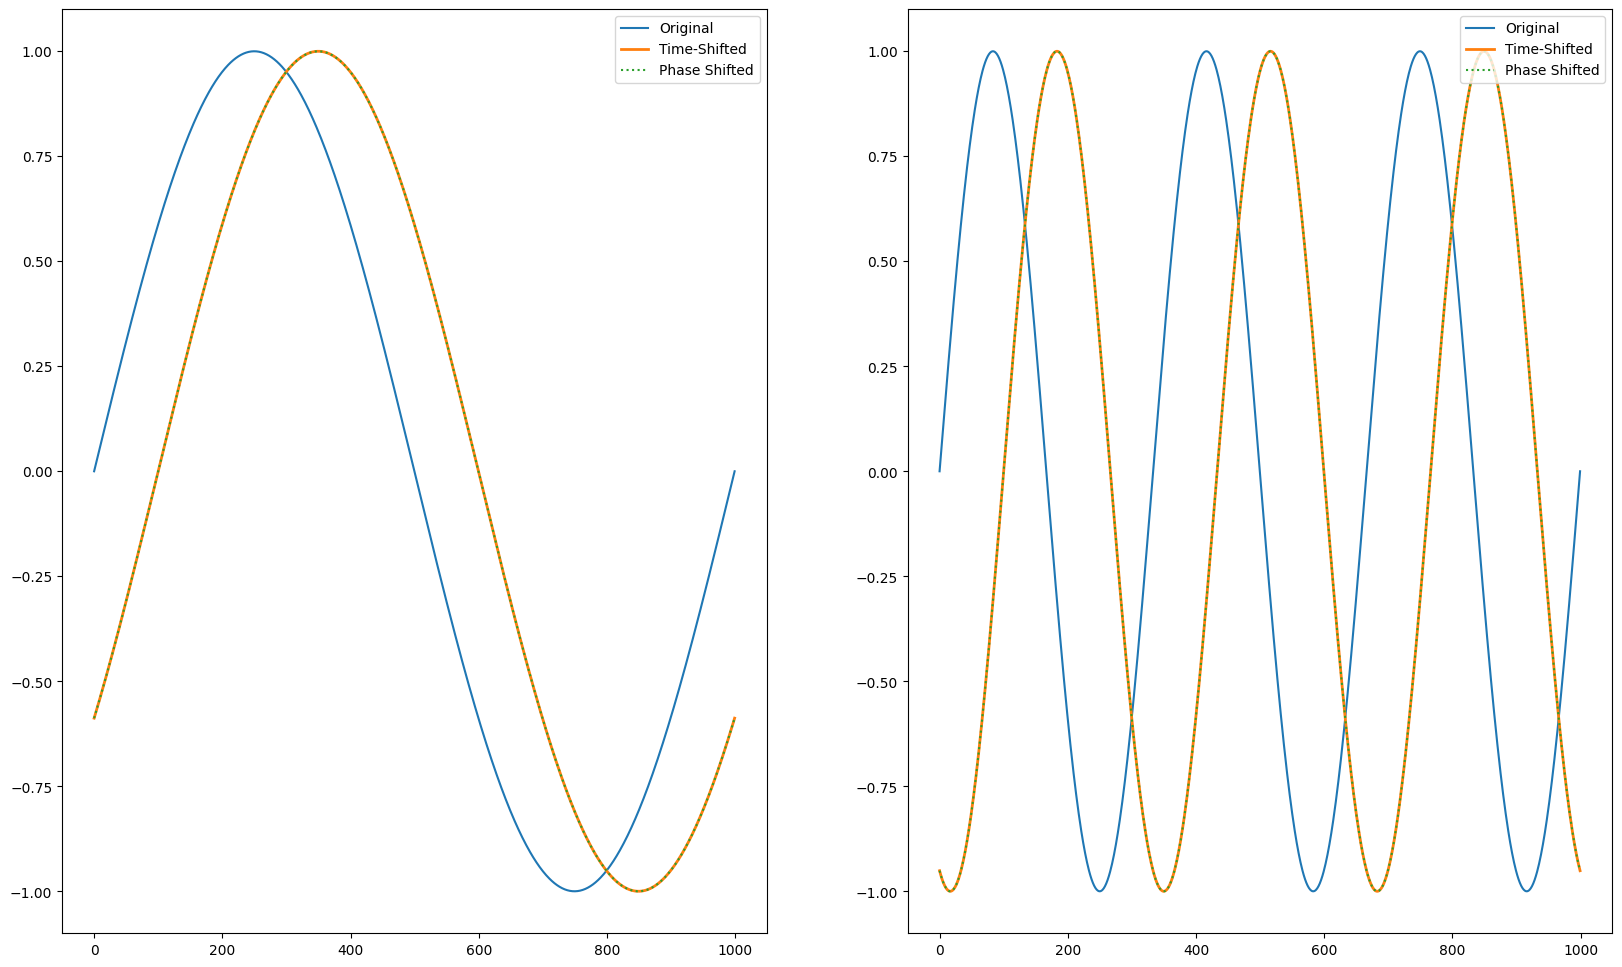

In [39]:
import numpy as np
import matplotlib.pyplot as plt


def signal(freq: float, time_delay: float, phase_shift: float):
    t = np.linspace(0, 1, 1000)
    return np.sin(2 * np.pi * freq * (t - time_delay) + phase_shift)

fig, axs = plt.subplots(1, 2, figsize=(20, 12))

axs[0].plot(signal(1, 0, 0), label='Original')
axs[0].plot(signal(1, 0.1, 0), linewidth=2, label='Time delayed')
axs[0].plot(signal(1, 0, -2 * np.pi * 0.1), linestyle=':', label='Phase shifted')
axs[0].legend()

axs[1].plot(signal(3, 0, 0), label='Original')
axs[1].plot(signal(3, 0.1, 0), linewidth=2, label='Time delayed')
axs[1].plot(signal(3, 0, -2 * np.pi * 3 * 0.1), linestyle=':', label='Phase shifted')
axs[1].legend(loc='upper right')



In [37]:
from src.reinforcement_learning.a2c.episodic.a2c import A2C
import gymnasium as gym
import torch
%load_ext autoreload
%autoreload 2

a2c = A2C(
    test_env,
    None,
    lambda x: None,
    None,
    5,
    0.5,
    1.0,
    None,
    None,
    1.0,
    None,
    None,
    
)

a2c.buffer.add(np.zeros((2, 2)), np.ones((2,)) * 64, np.zeros((2,), dtype=bool), None, torch.tensor([[1.5]] * 2) * 5)
a2c.buffer.add(np.zeros((2, 2)), np.ones((2,)) * 64, np.zeros((2,), dtype=bool), None, torch.tensor([[1.5]] * 2) * 4)
a2c.buffer.add(np.zeros((2, 2)), np.ones((2,)) * 64, np.zeros((2,), dtype=bool), None, torch.tensor([[1.5]] * 2) * 3)
a2c.buffer.add(np.zeros((2, 2)), np.ones((2,)) * 64, np.zeros((2,), dtype=bool), None, torch.tensor([[1.5]] * 2) * 2)
a2c.buffer.add(np.zeros((2, 2)), np.ones((2,)) * 64, np.zeros((2,), dtype=bool), None, torch.tensor([[1.5]] * 2))

a2c.compute_gae_and_returns(torch.tensor([[0.0]]), np.zeros((1,), dtype=bool))[0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([[116.5, 116.5],
       [114. , 114. ],
       [107.5, 107.5],
       [ 93. ,  93. ],
       [ 62.5,  62.5]], dtype=float32)

torch.Size([5, 5])